CO2 EMISSIONS ESTIMATOR USING LINEAR REGRESSION MODEL

First loading dataset using the library pandas

In [4]:
import pandas as pd
data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Dristi Database\projects\archive (1)\CO2 Emissions_Canada.csv")
print(data.head()) #to check if loaded correctly


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

Training And Testing the Model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
model=LinearRegression() #model object from linear regression
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = data['CO2 Emissions(g/km)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
predictions= model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [ 5.59471283  6.38079806 13.27032994]
Intercept: 51.52997801495354


Visualizing Predictions

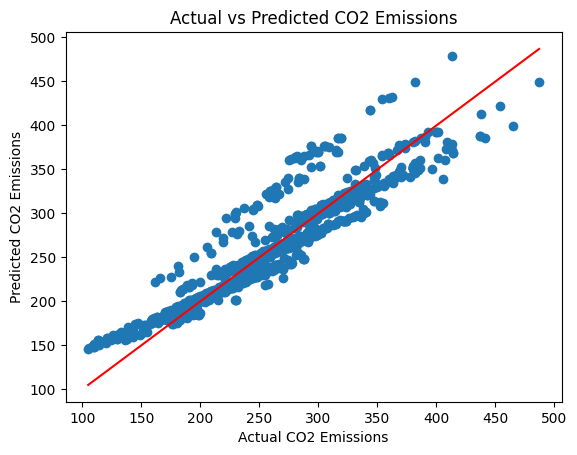

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.show()


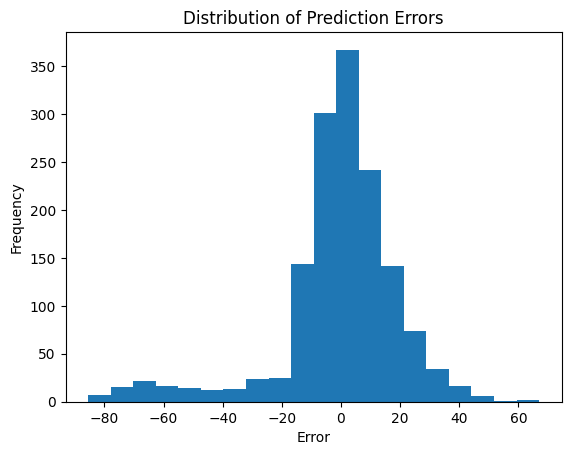

In [7]:
errors = y_test - predictions
plt.hist(errors, bins=20)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [9]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']